In [2]:
import pandas as pd
import numpy as np
import os
from src.data_process import load_one_month_data 
from src.irradiance import get_clearness_index
import matplotlib.pyplot as plt
import pvlib as pv

In [3]:
from dotenv import load_dotenv
load_dotenv()

RAW_DATAPATH = os.environ.get('RAW_DATAPATH')

In [4]:
irradiance, metadata = load_one_month_data(RAW_DATAPATH)

In [6]:
irradiance.head()

,ghi,ghi_sd,ghi_min,ghi_max,dni,dni_sd,dni_min,dni_max,dhi,dhi_sd,dhi_min,dhi_max,lwd,lwd_sd,lwd_min,lwd_max,temp_air,relative_humidity,pressure,local time
2022-01-01 00:00:00+00:00,346.0,11.5,331.0,366.0,630.0,21.5,591.0,682.0,179.0,16.2,154.0,209.0,213.0,4.3,206.0,221.0,-12.8,59.0,1002.0,2022-01-01 09:00:00+09:00
2022-01-01 00:01:00+00:00,383.0,11.1,367.0,401.0,541.0,21.3,515.0,590.0,238.0,15.2,210.0,263.0,228.0,3.6,221.0,234.0,NaN,NaN,NaN,2022-01-01 09:01:00+09:00
2022-01-01 00:02:00+00:00,NaN,NaN,NaN,NaN,431.0,49.3,347.0,514.0,NaN,NaN,NaN,NaN,239.0,3.3,234.0,245.0,NaN,NaN,NaN,2022-01-01 09:02:00+09:00
2022-01-01 00:03:00+00:00,NaN,NaN,NaN,NaN,227.0,50.1,163.0,340.0,NaN,NaN,NaN,NaN,249.0,2.7,245.0,253.0,NaN,NaN,NaN,2022-01-01 09:03:00+09:00
2022-01-01 00:04:00+00:00,NaN,NaN,NaN,NaN,124.0,26.5,77.0,163.0,NaN,NaN,NaN,NaN,254.0,0.1,253.0,254.0,NaN,NaN,NaN,2022-01-01 09:04:00+09:00


In [7]:
location = pv.location.Location(
    latitude=metadata['latitude'], longitude=metadata['longitude'], altitude=metadata['altitude']
)
print(location)

Location: 
  name: None
  latitude: 44.018
  longitude: 144.27999999999997
  altitude: 38
  tz: UTC


In [8]:
solar_position = location.get_solarposition(irradiance.index)
solar_position


,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2022-01-01 00:00:00+00:00,74.872561,74.933035,15.127439,15.066965,145.419907,-3.297910
2022-01-01 00:01:00+00:00,74.771186,74.831257,15.228814,15.168743,145.633578,-3.298239
2022-01-01 00:02:00+00:00,74.670358,74.730034,15.329642,15.269966,145.847634,-3.298569
2022-01-01 00:03:00+00:00,74.570079,74.629366,15.429921,15.370634,146.062075,-3.298899
2022-01-01 00:04:00+00:00,74.470351,74.529257,15.529649,15.470743,146.276901,-3.299228
...,...,...,...,...,...,...
2022-01-31 23:55:00+00:00,71.375944,71.424878,18.624056,18.575122,139.273790,-13.468469
2022-01-31 23:56:00+00:00,71.259064,71.307681,18.740936,18.692319,139.493410,-13.468566
2022-01-31 23:57:00+00:00,71.142703,71.191008,18.857297,18.808992,139.713493,-13.468664
2022-01-31 23:58:00+00:00,71.026865,71.074862,18.973135,18.925138,139.934040,-13.468761


In [9]:
clear_sky = location.get_clearsky(times=irradiance.index)


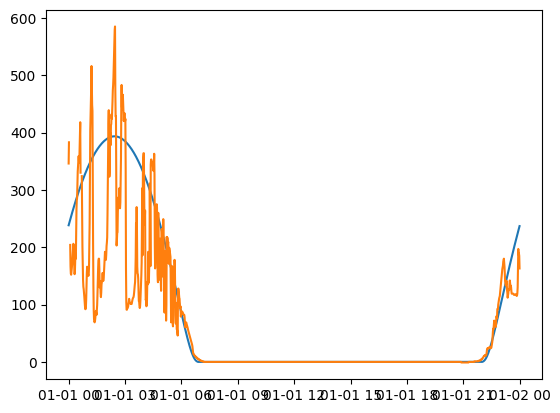

In [10]:
day = clear_sky[clear_sky.index.get_loc("2022-01-01")]
day_ghi = irradiance[irradiance.index.get_loc("2022-01-01")]
plt.figure()
plt.plot(day.index, day["ghi"])
plt.plot(day_ghi.index, day_ghi["ghi"])
